## Cargar libreria

In [27]:
# import library
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.manifold import TSNE

import matplotlib.pyplot as plt
%matplotlib inline

## Cargar

In [2]:
# load file
df1 = pd.read_csv("UCI_Credit_Card_BillATM.csv") 
df2 = pd.read_csv("UCI_Credit_Card_Pay.csv")
df3 = pd.read_csv("UCI_Credit_Card_PayATM.csv")
df4 = pd.read_csv("UCI_Credit_Card_PayNextMonth.csv")

## Visualizar

In [3]:
df1.head(10)

Unnamed: 0  ID LIMIT_BAL     SEX  BILL_AMT1  BILL_AMT2  BILL_AMT3  \
0           0   1   20000.0  female     3913.0     3102.0      689.0   
1           1   2  120000.0     NaN     2682.0     1725.0     2682.0   
2           2   3   90000.0  female    29239.0    14027.0    13559.0   
3           3   4   50000.0  female    46990.0    48233.0    49291.0   
4           4   5   50000.0    male     8617.0     5670.0    35835.0   
5           5   6   50000.0    male    64400.0    57069.0    57608.0   
6           6   7  500000.0    male   367965.0   412023.0   445007.0   
7           7   8  100000.0  female    11876.0      380.0      601.0   
8           8   9  140000.0     NaN    11285.0    14096.0    12108.0   
9           9  10   20000.0    male        0.0        0.0        0.0   

   BILL_AMT4  BILL_AMT5  BILL_AMT6  
0        0.0        0.0        0.0  
1     3272.0     3455.0     3261.0  
2    14331.0    14948.0    15549.0  
3    28314.0    28959.0    29547.0  
4    20940.0    19146.0    19131.0  
5    19394.0    19619.0    20024.0  
6   542653.0   483003.0   473944.0  
7      221.0     -159.0      567.0  
8    12211.0    11793.0     3719.0  
9        0.0    13007.0    13912.0

In [4]:
df2.head(10)

Unnamed: 0  ID LIMIT_BAL       AGE  PAY_0  PAY_2  PAY_3  PAY_4  PAY_5  \
0           0   1   20000.0   No info      2      2     -1     -1     -2   
1           1   2  120000.0  26 years     -1      2      0      0      0   
2           2   3   90000.0  34 years      0      0      0      0      0   
3           3   4   50000.0  37 years      0      0      0      0      0   
4           4   5   50000.0  57 years     -1      0     -1      0      0   
5           5   6   50000.0   No info      0      0      0      0      0   
6           6   7  500000.0  29 years      0      0      0      0      0   
7           7   8  100000.0  23 years      0     -1     -1      0      0   
8           8   9  140000.0  28 years      0      0      2      0      0   
9           9  10   20000.0  35 years     -2     -2     -2     -2     -1   

   PAY_6  
0     -2  
1      2  
2      0  
3      0  
4      0  
5      0  
6      0  
7     -1  
8      0  
9     -1

In [244]:
df3.head(10)

Unnamed: 0  ID LIMIT_BAL EDUCATION  PAY_AMT1  PAY_AMT2  PAY_AMT3  PAY_AMT4  \
0           0   1   20000.0         2       0.0     689.0       0.0       0.0   
1           1   2  120000.0         2       0.0    1000.0    1000.0    1000.0   
2           2   3   90000.0      Null    1518.0    1500.0    1000.0    1000.0   
3           3   4         -         2    2000.0    2019.0    1200.0    1100.0   
4           4   5   50000.0         2    2000.0   36681.0   10000.0    9000.0   
5           5   6   50000.0         1    2500.0    1815.0     657.0    1000.0   
6           6   7         -         1   55000.0   40000.0   38000.0   20239.0   
7           7   8  100000.0         2     380.0     601.0       0.0     581.0   
8           8   9  140000.0         3    3329.0       0.0     432.0    1000.0   
9           9  10   20000.0      Null       0.0       0.0       0.0   13007.0   

   PAY_AMT5  PAY_AMT6  
0       0.0       0.0  
1       0.0    2000.0  
2    1000.0    5000.0  
3    1069.0    1000.0  
4     689.0     679.0  
5    1000.0     800.0  
6   13750.0   13770.0  
7    1687.0    1542.0  
8    1000.0    1000.0  
9    1122.0       0.0

In [245]:
df4.head(10)

Unnamed: 0  ID SEX  EDUCATION  MARRIAGE   AGE  default.payment.next.month
0           0   1   2        2.0         1  24.0                           1
1           1   2   2        2.0         2  26.0                           1
2           2   3   2        2.0         2  34.0                           0
3           3   4   2        NaN         1  37.0                           0
4           4   5   1        2.0         1  57.0                           0
5           5   6   1        1.0         2  37.0                           0
6           6   7   1        NaN         2  29.0                           0
7           7   8   2        2.0         2  23.0                           0
8           8   9   2        3.0         1  28.0                           0
9           9  10   1        3.0         2  35.0                           0

## Análisar columnas y seleccionar columnas para el análisis.

#### DF1

In [246]:
df1.columns

Index(['Unnamed: 0', 'ID', 'LIMIT_BAL', 'SEX', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6'],
      dtype='object')

In [5]:
df1 = df1[['ID', 'LIMIT_BAL', 'SEX', 'BILL_AMT1', 'BILL_AMT2','BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']]

#### DF2

In [248]:
df2.columns

Index(['Unnamed: 0', 'ID', 'LIMIT_BAL', 'AGE', 'PAY_0', 'PAY_2', 'PAY_3',
       'PAY_4', 'PAY_5', 'PAY_6'],
      dtype='object')

In [6]:
df2 = df2[['ID', 'LIMIT_BAL', 'AGE', 'PAY_0', 'PAY_2', 'PAY_3','PAY_4', 'PAY_5', 'PAY_6']]

#### DF3

In [250]:
df3.columns

Index(['Unnamed: 0', 'ID', 'LIMIT_BAL', 'EDUCATION', 'PAY_AMT1', 'PAY_AMT2',
       'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6'],
      dtype='object')

In [7]:
df3 = df3[['ID', 'LIMIT_BAL', 'EDUCATION', 'PAY_AMT1', 'PAY_AMT2','PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']]

#### DF4

In [252]:
df4.columns

Index(['Unnamed: 0', 'ID', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE',
       'default.payment.next.month'],
      dtype='object')

In [8]:
df4 = df4[['ID', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE','default.payment.next.month']]

### Verificar filas totales

In [16]:
len(df1)

52

In [307]:
len(df2)

52

In [308]:
len(df3)

52

In [309]:
len(df4)

50

In [310]:
df1.dtypes

ID             int64
LIMIT_BAL     object
SEX           object
BILL_AMT1    float64
BILL_AMT2    float64
BILL_AMT3    float64
BILL_AMT4    float64
BILL_AMT5    float64
BILL_AMT6    float64
dtype: object

In [39]:
df2.dtypes

ID            int64
LIMIT_BAL    object
AGE          object
PAY_0         int64
PAY_2         int64
PAY_3         int64
PAY_4         int64
PAY_5         int64
PAY_6         int64
dtype: object

In [40]:
df3.dtypes

ID             int64
LIMIT_BAL     object
EDUCATION     object
PAY_AMT1     float64
PAY_AMT2     float64
PAY_AMT3     float64
PAY_AMT4     float64
PAY_AMT5     float64
PAY_AMT6     float64
dtype: object

In [41]:
df4.dtypes

ID                              int64
SEX                            object
EDUCATION                     float64
MARRIAGE                        int64
AGE                           float64
default.payment.next.month      int64
dtype: object

## Verificar datos duplicados y nulos

###  DF1

In [9]:
dup1 = df1[df1.duplicated()]
dup1

ID LIMIT_BAL     SEX  BILL_AMT1  BILL_AMT2  BILL_AMT3  BILL_AMT4  \
15   1   20000.0  female     3913.0     3102.0      689.0        0.0   
35   6   50000.0    male    64400.0    57069.0    57608.0    19394.0   

    BILL_AMT5  BILL_AMT6  
15        0.0        0.0  
35    19619.0    20024.0

In [222]:
pd.isna(df1).sum()

ID           0
LIMIT_BAL    0
SEX          7
BILL_AMT1    0
BILL_AMT2    0
BILL_AMT3    0
BILL_AMT4    0
BILL_AMT5    0
BILL_AMT6    0
dtype: int64

### DF2

In [255]:
dup2 = df2[df2.duplicated()]
dup2

ID LIMIT_BAL       AGE  PAY_0  PAY_2  PAY_3  PAY_4  PAY_5  PAY_6
10   1   20000.0   No info      2      2     -1     -1     -2     -2
51  26         -  23 years      0      0      0      0      0      0

In [224]:
pd.isna(df2).sum()

ID           0
LIMIT_BAL    0
AGE          0
PAY_0        0
PAY_2        0
PAY_3        0
PAY_4        0
PAY_5        0
PAY_6        0
dtype: int64

### DF3

In [256]:
dup3 = df3[df3.duplicated()]
dup3

ID LIMIT_BAL EDUCATION  PAY_AMT1  PAY_AMT2  PAY_AMT3  PAY_AMT4  PAY_AMT5  \
35   1   20000.0         2       0.0     689.0       0.0       0.0       0.0   
45   4         -         2    2000.0    2019.0    1200.0    1100.0    1069.0   

    PAY_AMT6  
35       0.0  
45    1000.0

In [229]:
pd.isna(df3).sum()

Unnamed: 0    0
ID            0
LIMIT_BAL     0
EDUCATION     0
PAY_AMT1      0
PAY_AMT2      0
PAY_AMT3      0
PAY_AMT4      0
PAY_AMT5      0
PAY_AMT6      0
dtype: int64

### DF4

In [257]:
dup4 = df4[df4.duplicated()]
dup4

Empty DataFrame
Columns: [ID, SEX, EDUCATION, MARRIAGE, AGE, default.payment.next.month]
Index: []

In [232]:
pd.isna(df4).sum()

Unnamed: 0                    0
ID                            0
SEX                           0
EDUCATION                     6
MARRIAGE                      0
AGE                           6
default.payment.next.month    0
dtype: int64

## Juntar las diferentes fuentes a partir del ID

unir df1 y df2 en base al ID y eliminar datos duplicado en base al mismo id

In [10]:
df = pd.merge(df1, df2, how='outer', on='ID')
df = df[df.duplicated(['ID'])==False].sort_values('ID')

len(df)

50

unir df y df3 en base al ID y eliminar datos duplicado en base al mismo id

In [11]:
df = pd.merge(df, df3, how='outer', on='ID')
df = df[df.duplicated(['ID'])==False].sort_values('ID')

len(df)

50

unir df y df4 en base al ID y pero manteniendo el df como tabla pivote

In [12]:
df = df.merge(df4, on="ID", how="left")

In [13]:
df.head()

ID LIMIT_BAL_x   SEX_x  BILL_AMT1  BILL_AMT2  BILL_AMT3  BILL_AMT4  \
0   1     20000.0  female     3913.0     3102.0      689.0        0.0   
1   2    120000.0     NaN     2682.0     1725.0     2682.0     3272.0   
2   3     90000.0  female    29239.0    14027.0    13559.0    14331.0   
3   4     50000.0  female    46990.0    48233.0    49291.0    28314.0   
4   5     50000.0    male     8617.0     5670.0    35835.0    20940.0   

   BILL_AMT5  BILL_AMT6 LIMIT_BAL_y  ... PAY_AMT2  PAY_AMT3  PAY_AMT4  \
0        0.0        0.0     20000.0  ...    689.0       0.0       0.0   
1     3455.0     3261.0    120000.0  ...   1000.0    1000.0    1000.0   
2    14948.0    15549.0     90000.0  ...   1500.0    1000.0    1000.0   
3    28959.0    29547.0     50000.0  ...   2019.0    1200.0    1100.0   
4    19146.0    19131.0     50000.0  ...  36681.0   10000.0    9000.0   

   PAY_AMT5  PAY_AMT6  SEX_y  EDUCATION_y MARRIAGE AGE_y  \
0       0.0       0.0      2          2.0        1  24.0   
1       0.0    2000.0      2          2.0        2  26.0   
2    1000.0    5000.0      2          2.0        2  34.0   
3    1069.0    1000.0      2          NaN        1  37.0   
4     689.0     679.0      1          2.0        1  57.0   

   default.payment.next.month  
0                           1  
1                           1  
2                           0  
3                           0  
4                           0  

[5 rows x 30 columns]

In [238]:
pd.isna(df).sum()

Unnamed: 0_x                    0
ID                              0
LIMIT_BAL_x                     0
SEX_x                           7
BILL_AMT1                       0
BILL_AMT2                       0
BILL_AMT3                       0
BILL_AMT4                       0
BILL_AMT5                       0
BILL_AMT6                       0
Unnamed: 0_y                    0
LIMIT_BAL_y                     0
AGE_x                           0
PAY_0                           0
PAY_2                           0
PAY_3                           0
PAY_4                           0
PAY_5                           0
PAY_6                           0
Unnamed: 0_x                    0
LIMIT_BAL                       0
EDUCATION_x                     0
PAY_AMT1                        0
PAY_AMT2                        0
PAY_AMT3                        0
PAY_AMT4                        0
PAY_AMT5                        0
PAY_AMT6                        0
Unnamed: 0_y                    0
SEX_y         

In [239]:
df.isna().any()

Unnamed: 0_x                    False
ID                              False
LIMIT_BAL_x                     False
SEX_x                            True
BILL_AMT1                       False
BILL_AMT2                       False
BILL_AMT3                       False
BILL_AMT4                       False
BILL_AMT5                       False
BILL_AMT6                       False
Unnamed: 0_y                    False
LIMIT_BAL_y                     False
AGE_x                           False
PAY_0                           False
PAY_2                           False
PAY_3                           False
PAY_4                           False
PAY_5                           False
PAY_6                           False
Unnamed: 0_x                    False
LIMIT_BAL                       False
EDUCATION_x                     False
PAY_AMT1                        False
PAY_AMT2                        False
PAY_AMT3                        False
PAY_AMT4                        False
PAY_AMT5    

In [343]:
df.describe()

ID      BILL_AMT1      BILL_AMT2      BILL_AMT3      BILL_AMT4  \
count  50.00000      50.000000      50.000000      50.000000      50.000000   
mean   25.50000   40728.900000   39434.140000   38789.640000   44198.400000   
std    14.57738   70909.573015   74923.928918   75100.364181  115988.212059   
min     1.00000    -109.000000    -425.000000    -527.000000    -923.000000   
25%    13.25000    4533.250000    3241.750000    1775.250000    2158.250000   
50%    25.50000   15191.500000   16311.000000   15467.000000   14835.000000   
75%    37.75000   45514.250000   38762.000000   35976.000000   28656.750000   
max    50.00000  367965.000000  412023.000000  445007.000000  628699.000000   

           BILL_AMT5     BILL_AMT6      PAY_0      PAY_2      PAY_3     PAY_4  \
count      50.000000      50.00000  50.000000  50.000000  50.000000  50.00000   
mean    33817.540000   35772.72000  -0.160000  -0.340000  -0.320000  -0.48000   
std     75796.473241   77322.03793   0.976458   1.022402   1.132813   0.99468   
min    -28335.000000   -1884.00000  -2.000000  -2.000000  -2.000000  -2.00000   
25%       931.000000     657.75000  -1.000000  -1.000000  -1.000000  -1.00000   
50%     15811.500000   12770.50000   0.000000   0.000000   0.000000   0.00000   
75%     29388.000000   29921.25000   0.000000   0.000000   0.000000   0.00000   
max    483003.000000  473944.00000   2.000000   2.000000   2.000000   2.00000   

           PAY_5      PAY_6      PAY_AMT1      PAY_AMT2      PAY_AMT3  \
count  50.000000  50.000000     50.000000     50.000000     50.000000   
mean   -0.460000  -0.440000   4967.140000   5063.180000   5383.720000   
std     0.930438   1.109514   9022.371108   9102.280844  12330.638916   
min    -2.000000  -2.000000      0.000000      0.000000      0.000000   
25%    -1.000000  -1.000000   1003.250000    336.000000    136.500000   
50%     0.000000   0.000000   2156.500000   1500.000000   1000.500000   
75%     0.000000   0.000000   3393.500000   4270.500000   5059.000000   
max     2.000000   2.000000  55000.000000  40000.000000  75940.000000   

           PAY_AMT4       PAY_AMT5      PAY_AMT6  
count      50.00000      50.000000     50.000000  
mean     9243.82000    8038.500000   4166.860000  
std     28412.22194   28596.092289  10922.925696  
min         0.00000       0.000000      0.000000  
25%       375.50000     271.750000      0.000000  
50%      1150.00000    1031.000000    898.500000  
75%      5800.00000    3000.000000   2375.000000  
max    188840.00000  195599.000000  51582.000000

In [466]:
df.head(10)

ID LIMIT_BAL_x   SEX_x  BILL_AMT1  BILL_AMT2  BILL_AMT3  BILL_AMT4  \
0   1     20000.0  female     3913.0     3102.0      689.0        0.0   
1   2    120000.0     NaN     2682.0     1725.0     2682.0     3272.0   
2   3     90000.0  female    29239.0    14027.0    13559.0    14331.0   
3   4     50000.0  female    46990.0    48233.0    49291.0    28314.0   
4   5     50000.0    male     8617.0     5670.0    35835.0    20940.0   
5   6     50000.0    male    64400.0    57069.0    57608.0    19394.0   
6   7    500000.0    male   367965.0   412023.0   445007.0   542653.0   
7   8    100000.0  female    11876.0      380.0      601.0      221.0   
8   9    140000.0     NaN    11285.0    14096.0    12108.0    12211.0   
9  10     20000.0    male        0.0        0.0        0.0        0.0   

   BILL_AMT5  BILL_AMT6 LIMIT_BAL_y  ... PAY_AMT2  PAY_AMT3  PAY_AMT4  \
0        0.0        0.0     20000.0  ...    689.0       0.0       0.0   
1     3455.0     3261.0    120000.0  ...   1000.0    1000.0    1000.0   
2    14948.0    15549.0     90000.0  ...   1500.0    1000.0    1000.0   
3    28959.0    29547.0     50000.0  ...   2019.0    1200.0    1100.0   
4    19146.0    19131.0     50000.0  ...  36681.0   10000.0    9000.0   
5    19619.0    20024.0     50000.0  ...   1815.0     657.0    1000.0   
6   483003.0   473944.0    500000.0  ...  40000.0   38000.0   20239.0   
7     -159.0      567.0    100000.0  ...    601.0       0.0     581.0   
8    11793.0     3719.0    140000.0  ...      0.0     432.0    1000.0   
9    13007.0    13912.0     20000.0  ...      0.0       0.0   13007.0   

   PAY_AMT5  PAY_AMT6  SEX_y  EDUCATION_y MARRIAGE AGE_y  \
0       0.0       0.0      2          2.0        1  24.0   
1       0.0    2000.0      2          2.0        2  26.0   
2    1000.0    5000.0      2          2.0        2  34.0   
3    1069.0    1000.0      2          NaN        1  37.0   
4     689.0     679.0      1          2.0        1  57.0   
5    1000.0     800.0      1          1.0        2  37.0   
6   13750.0   13770.0      1          NaN        2  29.0   
7    1687.0    1542.0      2          2.0        2  23.0   
8    1000.0    1000.0      2          3.0        1  28.0   
9    1122.0       0.0      1          3.0        2  35.0   

   default.payment.next.month  
0                           1  
1                           1  
2                           0  
3                           0  
4                           0  
5                           0  
6                           0  
7                           0  
8                           0  
9                           0  

[10 rows x 30 columns]

## Selecciona columnas para la normalización

In [14]:
df = df[["ID", "LIMIT_BAL_x", "SEX_x", "EDUCATION_x", "MARRIAGE", "AGE_y", "PAY_0", "PAY_2", "PAY_3", "PAY_4", "PAY_5", "PAY_6", "BILL_AMT1", "BILL_AMT2", "BILL_AMT3", "BILL_AMT4", "BILL_AMT5", "BILL_AMT6", "PAY_AMT1", "PAY_AMT2", "PAY_AMT3", "PAY_AMT4","PAY_AMT5", "PAY_AMT6", "default.payment.next.month"]]
df.columns = ["ID", "LIMIT_BAL", "SEX", "EDUCATION", "MARRIAGE", "AGE", "PAY_0", "PAY_2", "PAY_3", "PAY_4", "PAY_5", "PAY_6", "BILL_AMT1", "BILL_AMT2", "BILL_AMT3", "BILL_AMT4", "BILL_AMT5", "BILL_AMT6", "PAY_AMT1", "PAY_AMT2", "PAY_AMT3", "PAY_AMT4","PAY_AMT5", "PAY_AMT6", "default.payment.next.month"]
df

ID LIMIT_BAL     SEX EDUCATION  MARRIAGE   AGE  PAY_0  PAY_2  PAY_3  \
0    1   20000.0  female         2         1  24.0      2      2     -1   
1    2  120000.0     NaN         2         2  26.0     -1      2      0   
2    3   90000.0  female      Null         2  34.0      0      0      0   
3    4   50000.0  female         2         1  37.0      0      0      0   
4    5   50000.0    male         2         1  57.0     -1      0     -1   
5    6   50000.0    male         1         2  37.0      0      0      0   
6    7  500000.0    male         1         2  29.0      0      0      0   
7    8  100000.0  female         2         2  23.0      0     -1     -1   
8    9  140000.0     NaN         3         1  28.0      0      0      2   
9   10   20000.0    male      Null         2  35.0     -2     -2     -2   
10  11  200000.0  female         3         2   NaN      0      0      2   
11  12  260000.0     NaN         1         2  51.0     -1     -1     -1   
12  13  630000.0  female      Null         2  41.0     -1      0     -1   
13  14         -    male         2         2  30.0      1      2      2   
14  15  250000.0    male         1         2  29.0      0      0      0   
15  16   50000.0  female         3         3  23.0      1      2      0   
16  17   20000.0    male         1         2  24.0      0      0      2   
17  18  320000.0    male         1         1  49.0      0      0      0   
18  19         -  female         1         1  49.0      1     -2     -2   
19  20  180000.0  female         1         2  29.0      1     -2     -2   
20  21  130000.0  female         3         2  39.0      0      0      0   
21  22  120000.0     NaN         2         1  39.0     -1     -1     -1   
22  23         -  female         2         2  26.0      2      0      0   
23  24  450000.0  female      Null         1  40.0     -2     -2     -2   
24  25         -    male         1         2  23.0      0      0      0   
25  26   50000.0    male         3         2   NaN      0      0      0   
26  27   60000.0    male         1         2  27.0      1     -2     -1   
27  28   50000.0  female         3         2  30.0      0      0      0   
28  29   50000.0  female         3         1  47.0     -1     -1     -1   
29  30   50000.0    male         1         2  26.0      0      0      0   
30  31  230000.0  female         1         2   NaN     -1     -1     -1   
31  32   50000.0     NaN         2         2  33.0      2      0      0   
32  33  100000.0    male      Null         2  32.0      0      0      0   
33  34  500000.0  female         2         1   NaN     -2     -2     -2   
34  35  500000.0    male         1         1  58.0     -2     -2     -2   
35  36  160000.0    male         1         2  30.0     -1     -1     -2   
36  37         -    male         2         1  40.0      0      0      0   
37  38   60000.0  female         2         2  22.0      0      0      0   
38  39   50000.0    male         1         2  25.0      1     -1     -1   
39  40  280000.0    male         1         2  31.0     -1     -1      2   
40  41  360000.0    male         1         2  33.0      0      0      0   
41  42   70000.0  female      Null         2  25.0      0      0      0   
42  43   10000.0    male         2         2   NaN      0      0      0   
43  44  140000.0  female      Null         1   NaN      0      0      0   
44  45   40000.0  female         1         2  30.0      0      0      0   
45  46  210000.0    male         1         2  29.0     -2     -2     -2   
46  47   20000.0     NaN         1         2  22.0      0      0      2   
47  48  150000.0  female         5         2  46.0      0      0     -1   
48  49  380000.0     NaN         2         2  32.0     -1     -1     -1   
49  50         -    male         1         2  24.0      0      0      0   

    PAY_4  ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  \
0      -1  ...        0.0        0.0        0.0       0.0     689.0       0.0   
1       0  ...  

In [264]:
df.head(10)

ID LIMIT_BAL     SEX EDUCATION  MARRIAGE   AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
0   1   20000.0  female         2         1  24.0      2      2     -1     -1   
1   2  120000.0     NaN         2         2  26.0     -1      2      0      0   
2   3   90000.0  female      Null         2  34.0      0      0      0      0   
3   4   50000.0  female         2         1  37.0      0      0      0      0   
4   5   50000.0    male         2         1  57.0     -1      0     -1      0   
5   6   50000.0    male         1         2  37.0      0      0      0      0   
6   7  500000.0    male         1         2  29.0      0      0      0      0   
7   8  100000.0  female         2         2  23.0      0     -1     -1      0   
8   9  140000.0     NaN         3         1  28.0      0      0      2      0   
9  10   20000.0    male      Null         2  35.0     -2     -2     -2     -2   

   ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  \
0  ...        0.0        0.0        0.0       0.0     689.0       0.0   
1  ...     3272.0     3455.0     3261.0       0.0    1000.0    1000.0   
2  ...    14331.0    14948.0    15549.0    1518.0    1500.0    1000.0   
3  ...    28314.0    28959.0    29547.0    2000.0    2019.0    1200.0   
4  ...    20940.0    19146.0    19131.0    2000.0   36681.0   10000.0   
5  ...    19394.0    19619.0    20024.0    2500.0    1815.0     657.0   
6  ...   542653.0   483003.0   473944.0   55000.0   40000.0   38000.0   
7  ...      221.0     -159.0      567.0     380.0     601.0       0.0   
8  ...    12211.0    11793.0     3719.0    3329.0       0.0     432.0   
9  ...        0.0    13007.0    13912.0       0.0       0.0       0.0   

   PAY_AMT4  PAY_AMT5  PAY_AMT6  default.payment.next.month  
0       0.0       0.0       0.0                           1  
1    1000.0       0.0    2000.0                           1  
2    1000.0    1000.0    5000.0                           0  
3    1100.0    1069.0    1000.0                           0  
4    9000.0     689.0     679.0                           0  
5    1000.0    1000.0     800.0                           0  
6   20239.0   13750.0   13770.0                           0  
7     581.0    1687.0    1542.0                           0  
8    1000.0    1000.0    1000.0                           0  
9   13007.0    1122.0       0.0                           0  

[10 rows x 25 columns]

In [15]:
df_copy = df

### Imputar datos en la columna SEX y EDUCATION

1.- Remplazar todas aquellas filas que contenga datos NaN en la columna SEX 
se utilizara la codificación one-hot para, para crear variable binarias y reemplazar los valores NaN

In [265]:
df_copy.describe()

ID   MARRIAGE        AGE      PAY_0      PAY_2      PAY_3  \
count  50.00000  50.000000  44.000000  50.000000  50.000000  50.000000   
mean   25.50000   1.760000  33.272727  -0.160000  -0.340000  -0.320000   
std    14.57738   0.476381   9.519536   0.976458   1.022402   1.132813   
min     1.00000   1.000000  22.000000  -2.000000  -2.000000  -2.000000   
25%    13.25000   1.250000  26.000000  -1.000000  -1.000000  -1.000000   
50%    25.50000   2.000000  30.000000   0.000000   0.000000   0.000000   
75%    37.75000   2.000000  39.000000   0.000000   0.000000   0.000000   
max    50.00000   3.000000  58.000000   2.000000   2.000000   2.000000   

          PAY_4      PAY_5      PAY_6      BILL_AMT1  ...      BILL_AMT4  \
count  50.00000  50.000000  50.000000      50.000000  ...      50.000000   
mean   -0.48000  -0.460000  -0.440000   40728.900000  ...   44198.400000   
std     0.99468   0.930438   1.109514   70909.573015  ...  115988.212059   
min    -2.00000  -2.000000  -2.000000    -109.000000  ...    -923.000000   
25%    -1.00000  -1.000000  -1.000000    4533.250000  ...    2158.250000   
50%     0.00000   0.000000   0.000000   15191.500000  ...   14835.000000   
75%     0.00000   0.000000   0.000000   45514.250000  ...   28656.750000   
max     2.00000   2.000000   2.000000  367965.000000  ...  628699.000000   

           BILL_AMT5     BILL_AMT6      PAY_AMT1      PAY_AMT2      PAY_AMT3  \
count      50.000000      50.00000     50.000000     50.000000     50.000000   
mean    33817.540000   35772.72000   4967.140000   5063.180000   5383.720000   
std     75796.473241   77322.03793   9022.371108   9102.280844  12330.638916   
min    -28335.000000   -1884.00000      0.000000      0.000000      0.000000   
25%       931.000000     657.75000   1003.250000    336.000000    136.500000   
50%     15811.500000   12770.50000   2156.500000   1500.000000   1000.500000   
75%     29388.000000   29921.25000   3393.500000   4270.500000   5059.000000   
max    483003.000000  473944.00000  55000.000000  40000.000000  75940.000000   

           PAY_AMT4       PAY_AMT5      PAY_AMT6  default.payment.next.month  
count      50.00000      50.000000     50.000000                   50.000000  
mean     9243.82000    8038.500000   4166.860000                    0.260000  
std     28412.22194   28596.092289  10922.925696                    0.443087  
min         0.00000       0.000000      0.000000                    0.000000  
25%       375.50000     271.750000      0.000000                    0.000000  
50%      1150.00000    1031.000000    898.500000                    0.000000  
75%      5800.00000    3000.000000   2375.000000                    0.750000  
max    188840.00000  195599.000000  51582.000000                    1.000000  

[8 rows x 22 columns]

In [16]:
dummies = pd.get_dummies(df['SEX'], drop_first = True)

In [17]:
df_copy = pd.concat([df_copy, dummies], axis=1)

In [18]:
df_copy.head()

ID LIMIT_BAL     SEX EDUCATION  MARRIAGE   AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
0   1   20000.0  female         2         1  24.0      2      2     -1     -1   
1   2  120000.0     NaN         2         2  26.0     -1      2      0      0   
2   3   90000.0  female      Null         2  34.0      0      0      0      0   
3   4   50000.0  female         2         1  37.0      0      0      0      0   
4   5   50000.0    male         2         1  57.0     -1      0     -1      0   

   ...  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  PAY_AMT4  \
0  ...        0.0        0.0       0.0     689.0       0.0       0.0   
1  ...     3455.0     3261.0       0.0    1000.0    1000.0    1000.0   
2  ...    14948.0    15549.0    1518.0    1500.0    1000.0    1000.0   
3  ...    28959.0    29547.0    2000.0    2019.0    1200.0    1100.0   
4  ...    19146.0    19131.0    2000.0   36681.0   10000.0    9000.0   

   PAY_AMT5  PAY_AMT6  default.payment.next.month  male  
0       0.0       0.0                           1     0  
1       0.0    2000.0                           1     0  
2    1000.0    5000.0                           0     0  
3    1069.0    1000.0                           0     0  
4     689.0     679.0                           0     1  

[5 rows x 26 columns]

In [19]:
df_copy.loc[df_copy['male']==0, 'SEX'] = 'female'

In [20]:
df_copy.head()

ID LIMIT_BAL     SEX EDUCATION  MARRIAGE   AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
0   1   20000.0  female         2         1  24.0      2      2     -1     -1   
1   2  120000.0  female         2         2  26.0     -1      2      0      0   
2   3   90000.0  female      Null         2  34.0      0      0      0      0   
3   4   50000.0  female         2         1  37.0      0      0      0      0   
4   5   50000.0    male         2         1  57.0     -1      0     -1      0   

   ...  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  PAY_AMT4  \
0  ...        0.0        0.0       0.0     689.0       0.0       0.0   
1  ...     3455.0     3261.0       0.0    1000.0    1000.0    1000.0   
2  ...    14948.0    15549.0    1518.0    1500.0    1000.0    1000.0   
3  ...    28959.0    29547.0    2000.0    2019.0    1200.0    1100.0   
4  ...    19146.0    19131.0    2000.0   36681.0   10000.0    9000.0   

   PAY_AMT5  PAY_AMT6  default.payment.next.month  male  
0       0.0       0.0                           1     0  
1       0.0    2000.0                           1     0  
2    1000.0    5000.0                           0     0  
3    1069.0    1000.0                           0     0  
4     689.0     679.0                           0     1  

[5 rows x 26 columns]

In [21]:
df_copy.drop('male', axis=1, inplace=True)

In [22]:
df_copy.head(5)

ID LIMIT_BAL     SEX EDUCATION  MARRIAGE   AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
0   1   20000.0  female         2         1  24.0      2      2     -1     -1   
1   2  120000.0  female         2         2  26.0     -1      2      0      0   
2   3   90000.0  female      Null         2  34.0      0      0      0      0   
3   4   50000.0  female         2         1  37.0      0      0      0      0   
4   5   50000.0    male         2         1  57.0     -1      0     -1      0   

   ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  \
0  ...        0.0        0.0        0.0       0.0     689.0       0.0   
1  ...     3272.0     3455.0     3261.0       0.0    1000.0    1000.0   
2  ...    14331.0    14948.0    15549.0    1518.0    1500.0    1000.0   
3  ...    28314.0    28959.0    29547.0    2000.0    2019.0    1200.0   
4  ...    20940.0    19146.0    19131.0    2000.0   36681.0   10000.0   

   PAY_AMT4  PAY_AMT5  PAY_AMT6  default.payment.next.month  
0       0.0       0.0       0.0                           1  
1    1000.0       0.0    2000.0                           1  
2    1000.0    1000.0    5000.0                           0  
3    1100.0    1069.0    1000.0                           0  
4    9000.0     689.0     679.0                           0  

[5 rows x 25 columns]

2.- Remplazar los valores NaN de la columna AGE por la media

In [23]:
df_copy["AGE"].dtype
df_copy['AGE'].fillna((round(df_copy['AGE'].mean())), inplace=True)

In [24]:
df_copy.head(10)

ID LIMIT_BAL     SEX EDUCATION  MARRIAGE   AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
0   1   20000.0  female         2         1  24.0      2      2     -1     -1   
1   2  120000.0  female         2         2  26.0     -1      2      0      0   
2   3   90000.0  female      Null         2  34.0      0      0      0      0   
3   4   50000.0  female         2         1  37.0      0      0      0      0   
4   5   50000.0    male         2         1  57.0     -1      0     -1      0   
5   6   50000.0    male         1         2  37.0      0      0      0      0   
6   7  500000.0    male         1         2  29.0      0      0      0      0   
7   8  100000.0  female         2         2  23.0      0     -1     -1      0   
8   9  140000.0  female         3         1  28.0      0      0      2      0   
9  10   20000.0    male      Null         2  35.0     -2     -2     -2     -2   

   ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  \
0  ...        0.0        0.0        0.0       0.0     689.0       0.0   
1  ...     3272.0     3455.0     3261.0       0.0    1000.0    1000.0   
2  ...    14331.0    14948.0    15549.0    1518.0    1500.0    1000.0   
3  ...    28314.0    28959.0    29547.0    2000.0    2019.0    1200.0   
4  ...    20940.0    19146.0    19131.0    2000.0   36681.0   10000.0   
5  ...    19394.0    19619.0    20024.0    2500.0    1815.0     657.0   
6  ...   542653.0   483003.0   473944.0   55000.0   40000.0   38000.0   
7  ...      221.0     -159.0      567.0     380.0     601.0       0.0   
8  ...    12211.0    11793.0     3719.0    3329.0       0.0     432.0   
9  ...        0.0    13007.0    13912.0       0.0       0.0       0.0   

   PAY_AMT4  PAY_AMT5  PAY_AMT6  default.payment.next.month  
0       0.0       0.0       0.0                           1  
1    1000.0       0.0    2000.0                           1  
2    1000.0    1000.0    5000.0                           0  
3    1100.0    1069.0    1000.0                           0  
4    9000.0     689.0     679.0                           0  
5    1000.0    1000.0     800.0                           0  
6   20239.0   13750.0   13770.0                           0  
7     581.0    1687.0    1542.0                           0  
8    1000.0    1000.0    1000.0                           0  
9   13007.0    1122.0       0.0                           0  

[10 rows x 25 columns]

3.- Limpiar columna education en los valores NULL por la media con la funcioncionalidad de enconder

In [25]:
df_copy['EDUCATION'] = df_copy['EDUCATION'].replace('Null', np.nan)

In [28]:
imp = SimpleImputer()

In [29]:
df_copy['EDUCATION'] = np.round(imp.fit_transform(df_copy[["EDUCATION"]]).ravel())

In [30]:
df_copy.head()

ID LIMIT_BAL     SEX  EDUCATION  MARRIAGE   AGE  PAY_0  PAY_2  PAY_3  \
0   1   20000.0  female        2.0         1  24.0      2      2     -1   
1   2  120000.0  female        2.0         2  26.0     -1      2      0   
2   3   90000.0  female        2.0         2  34.0      0      0      0   
3   4   50000.0  female        2.0         1  37.0      0      0      0   
4   5   50000.0    male        2.0         1  57.0     -1      0     -1   

   PAY_4  ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  \
0     -1  ...        0.0        0.0        0.0       0.0     689.0       0.0   
1      0  ...     3272.0     3455.0     3261.0       0.0    1000.0    1000.0   
2      0  ...    14331.0    14948.0    15549.0    1518.0    1500.0    1000.0   
3      0  ...    28314.0    28959.0    29547.0    2000.0    2019.0    1200.0   
4      0  ...    20940.0    19146.0    19131.0    2000.0   36681.0   10000.0   

   PAY_AMT4  PAY_AMT5  PAY_AMT6  default.payment.next.month  
0       0.0       0.0       0.0                           1  
1    1000.0       0.0    2000.0                           1  
2    1000.0    1000.0    5000.0                           0  
3    1100.0    1069.0    1000.0                           0  
4    9000.0     689.0     679.0                           0  

[5 rows x 25 columns]

### Realizar el enconder de los datos categoricos tipo string a numericos

In [ ]:
df_ = pd.DataFrame()

# selecionar las columnas tipo string
columns_ = df_copy.select_dtypes(include = "object").columns
labelencoder = LabelEncoder()

# respaldar el dataframer
df_ = df_copy.copy()
for col in columns_:
    df_[col] = labelencoder.fit_transform(df_[col])
    
df_.headb()

Se utiliza la normalización media para los rangos mas disperso para todo elemento del DataFramer

In [39]:

def mean_norm(df_input):
    return df_input.apply(lambda x: (x-x.mean())/ x.std(), axis=0)

df_mean_norm = mean_norm(df_)
df_mean_norm.head()


ID  LIMIT_BAL       SEX  EDUCATION  MARRIAGE       AGE     PAY_0  \
0 -1.680686  -0.449354 -0.877496   0.261884 -1.595362 -1.036092  2.212078   
1 -1.612087  -1.144230 -0.877496   0.261884  0.503799 -0.811829 -0.860252   
2 -1.543487   1.519464 -0.877496   0.261884  0.503799  0.085220  0.163858   
3 -1.474888   0.940400 -0.877496   0.261884 -1.595362  0.421613  0.163858   
4 -1.406288   0.940400  1.116814   0.261884 -1.595362  2.664235 -0.860252   

      PAY_2     PAY_3     PAY_4  ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  \
0  2.288728 -0.600276 -0.522781  ...  -0.381059  -0.446162  -0.462646   
1  2.288728  0.282483  0.482567  ...  -0.352850  -0.400580  -0.420472   
2  0.332550  0.282483  0.482567  ...  -0.257504  -0.248950  -0.261552   
3  0.332550  0.282483  0.482567  ...  -0.136948  -0.064100  -0.080517   
4  0.332550 -0.600276  0.482567  ...  -0.200524  -0.193565  -0.215226   

   PAY_AMT1  PAY_AMT2  PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6  \
0 -0.550536 -0.480559 -0.436613 -0.325347 -0.281105 -0.381478   
1 -0.550536 -0.446391 -0.355514 -0.290150 -0.281105 -0.198377   
2 -0.382288 -0.391460 -0.355514 -0.290150 -0.246135  0.076274   
3 -0.328865 -0.334441 -0.339295 -0.286631 -0.243722 -0.289928   
4 -0.328865  3.473615  0.374375 -0.008582 -0.257011 -0.319316   

   default.payment.next.month  
0                    1.670099  
1                    1.670099  
2                   -0.586792  
3                   -0.586792  
4                   -0.586792  

[5 rows x 25 columns]

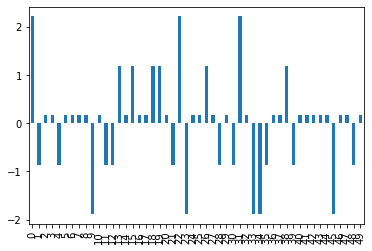

In [35]:
df_mean_norm['PAY_0'].plot(kind='bar')

Se utiliza la normalización en base a los cuantiles en base a los valores en cantidades (Ventas)

1.- Ordenación de los valores dentro de cada columna (Ranking)

2.- Promedio por fila y reemplazar el valor de cada elemento de la fila con el promedio

3.- Reordenar los valores al orden original

In [44]:
def quantile_norm(df_input):
    sorted_df = pd.DataFrame(np.sort(df_input.values,axis=0), index=df_input.index, columns=df_input.columns)
    mean_df = sorted_df.mean(axis=1)
    mean_df.index = np.arange(1, len(mean_df) + 1)
    quantile_df =df_input.rank(method="min").stack().astype(int).map(mean_df).unstack()
    return(quantile_df)

df_quantile_norm = quantile_norm(df_)
df_quantile_norm.head()

ID  LIMIT_BAL      SEX  EDUCATION  MARRIAGE       AGE     PAY_0  \
0 -1287.60    1769.92 -1287.60    2828.08  -1287.60      0.84  53487.32   
1   -74.04     190.96 -1287.60    2828.08    751.04    317.52      0.84   
2    -5.72  136710.32 -1287.60    2828.08    751.04   6946.92   1298.28   
3     0.68    6051.80 -1287.60    2828.08  -1287.60   8536.52   1298.28   
4     0.72    6051.80  4712.64    2828.08  -1287.60  76267.88      0.84   

      PAY_2    PAY_3    PAY_4  ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  \
0  40341.08    76.24   190.96  ...      -5.72       0.68      -5.72  -1287.60   
1  40341.08  2695.20  2828.08  ...    1298.28    1048.72    1298.28  -1287.60   
2   1769.92  2695.20  2828.08  ...    3798.36    3798.36    4483.80   2439.88   
3   1769.92  2695.20  2828.08  ...    8536.52    8536.52    8536.52   3230.80   
4   1769.92    76.24  2828.08  ...    6273.96    5336.56    5336.56   3230.80   

   PAY_AMT2  PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6  \
0   1298.28   -1287.6  -1287.60  -1287.60  -1287.60   
1   1601.52    1921.6   1921.60  -1287.60   7931.36   
2   3478.12    1921.6   1921.60   2439.88  18097.04   
3   5336.56    4483.8   3798.36   4228.80   4228.80   
4  76267.88   19199.8  13064.48   1048.72   2695.20   

   default.payment.next.month  
0                     9539.44  
1                     9539.44  
2                    -1287.60  
3                    -1287.60  
4                    -1287.60  

[5 rows x 25 columns]

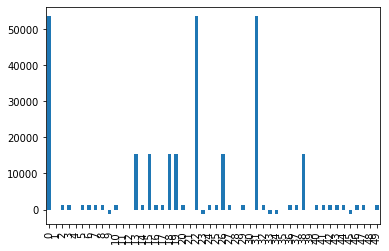

In [45]:
df_quantile_norm['PAY_0'].plot(kind='bar')

## Exportar

In [36]:
df_copy.rename(columns={
    'ID': 'ID', 
    'LIMIT_BAL': 'Limit Balance',
    'SEX' : 'Sex',
    'EDUCATION' : 'Education',
    'MARRIAGE' : 'Marriage',
    'AGE' : 'Age',
    'PAY_0' : 'PAY 0',
    'PAY_1' : 'PAY 1',
    'PAY_2' : 'PAY 2',
    'PAY_3' : 'PAY 3',
    'PAY_4' : 'PAY 4',
    'PAY_5' : 'PAY 5',
    'PAY_6' : 'PAY 6',
    'BILL_AMT1' : 'BILL AMT 1',
    'BILL_AMT2' : 'BILL AMT 2',
    'BILL_AMT3' : 'BILL AMT 3',
    'BILL_AMT4' : 'BILL AMT 4',
    'BILL_AMT5' : 'BILL AMT 5',
    'BILL_AMT6' : 'BILL AMT 6',
    'PAY_AMT1' : 'PAY AMT 1',
    'PAY_AMT2' : 'PAY AMT 2',
    'PAY_AMT3' : 'PAY AMT 3',
    'PAY_AMT4' : 'PAY AMT 4',
    'PAY_AMT5' : 'PAY AMT 5',
    'PAY_AMT6' : 'PAY AMT 6',
    'default.payment.next.month' : 'default payment next month'
}, inplace=True)

In [37]:
df_copy.to_excel("miniproyecto1.xlsx")

In [286]:
df_copy

ID LIMIT_BAL     SEX  EDUCATION  MARRIAGE   AGE  PAY_0  PAY_2  PAY_3  \
0    1   20000.0  female        2.0         1  24.0      2      2     -1   
1    2  120000.0  female        2.0         2  26.0     -1      2      0   
2    3   90000.0  female        2.0         2  34.0      0      0      0   
3    4   50000.0  female        2.0         1  37.0      0      0      0   
4    5   50000.0    male        2.0         1  57.0     -1      0     -1   
5    6   50000.0    male        1.0         2  37.0      0      0      0   
6    7  500000.0    male        1.0         2  29.0      0      0      0   
7    8  100000.0  female        2.0         2  23.0      0     -1     -1   
8    9  140000.0  female        3.0         1  28.0      0      0      2   
9   10   20000.0    male        2.0         2  35.0     -2     -2     -2   
10  11  200000.0  female        3.0         2  33.0      0      0      2   
11  12  260000.0  female        1.0         2  51.0     -1     -1     -1   
12  13  630000.0  female        2.0         2  41.0     -1      0     -1   
13  14         -    male        2.0         2  30.0      1      2      2   
14  15  250000.0    male        1.0         2  29.0      0      0      0   
15  16   50000.0  female        3.0         3  23.0      1      2      0   
16  17   20000.0    male        1.0         2  24.0      0      0      2   
17  18  320000.0    male        1.0         1  49.0      0      0      0   
18  19         -  female        1.0         1  49.0      1     -2     -2   
19  20  180000.0  female        1.0         2  29.0      1     -2     -2   
20  21  130000.0  female        3.0         2  39.0      0      0      0   
21  22  120000.0  female        2.0         1  39.0     -1     -1     -1   
22  23         -  female        2.0         2  26.0      2      0      0   
23  24  450000.0  female        2.0         1  40.0     -2     -2     -2   
24  25         -    male        1.0         2  23.0      0      0      0   
25  26   50000.0    male        3.0         2  33.0      0      0      0   
26  27   60000.0    male        1.0         2  27.0      1     -2     -1   
27  28   50000.0  female        3.0         2  30.0      0      0      0   
28  29   50000.0  female        3.0         1  47.0     -1     -1     -1   
29  30   50000.0    male        1.0         2  26.0      0      0      0   
30  31  230000.0  female        1.0         2  33.0     -1     -1     -1   
31  32   50000.0  female        2.0         2  33.0      2      0      0   
32  33  100000.0    male        2.0         2  32.0      0      0      0   
33  34  500000.0  female        2.0         1  33.0     -2     -2     -2   
34  35  500000.0    male        1.0         1  58.0     -2     -2     -2   
35  36  160000.0    male        1.0         2  30.0     -1     -1     -2   
36  37         -    male        2.0         1  40.0      0      0      0   
37  38   60000.0  female        2.0         2  22.0      0      0      0   
38  39   50000.0    male        1.0         2  25.0      1     -1     -1   
39  40  280000.0    male        1.0         2  31.0     -1     -1      2   
40  41  360000.0    male        1.0         2  33.0      0      0      0   
41  42   70000.0  female        2.0         2  25.0      0      0      0   
42  43   10000.0    male        2.0         2  33.0      0      0      0   
43  44  140000.0  female        2.0         1  33.0      0      0      0   
44  45   40000.0  female        1.0         2  30.0      0      0      0   
45  46  210000.0    male        1.0         2  29.0     -2     -2     -2   
46  47   20000.0  female        1.0         2  22.0      0      0      2   
47  48  150000.0  female        5.0         2  46.0      0      0     -1   
48  49  380000.0  female        2.0         2  32.0     -1     -1     -1   
49  50         -    male        1.0         2  24.0      0      0      0   

    PAY_4  ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  \
0      -1  ...        0.0        0.0        0.

In [210]:
df2 = pd.read_excel('miniproyecto1.xlsx')
df2.head()

Unnamed: 0  ID LIMIT_BAL     SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  \
0           0   1   20000.0  female          2         1   24      2      2   
1           1   2  120000.0  female          2         2   26     -1      2   
2           3   4   50000.0  female          2         1   37      0      0   
3           4   5   50000.0    male          2         1   57     -1      0   
4           5   6   50000.0    male          1         2   37      0      0   

   PAY_3  ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  \
0     -1  ...          0          0          0         0       689         0   
1      0  ...       3272       3455       3261         0      1000      1000   
2      0  ...      28314      28959      29547      2000      2019      1200   
3     -1  ...      20940      19146      19131      2000     36681     10000   
4      0  ...      19394      19619      20024      2500      1815       657   

   PAY_AMT4  PAY_AMT5  PAY_AMT6  default.payment.next.month  
0         0         0         0                           1  
1      1000         0      2000                           1  
2      1100      1069      1000                           0  
3      9000       689       679                           0  
4      1000      1000       800                           0  

[5 rows x 26 columns]

In [174]:
df3 = df2.groupby('ID').sum()
df3.reset_index(inplace=True)
df3.drop('ID', axis=1, inplace=True)

In [177]:
df3.head()

Unnamed: 0  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  PAY_5  \
0           0          2         1   24      2      2     -1     -1     -2   
1           1          2         2   26     -1      2      0      0      0   
2           3          2         1   37      0      0      0      0      0   
3           4          2         1   57     -1      0     -1      0      0   
4           5          1         2   37      0      0      0      0      0   

   PAY_6  ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  \
0     -2  ...          0          0          0         0       689         0   
1      2  ...       3272       3455       3261         0      1000      1000   
2      0  ...      28314      28959      29547      2000      2019      1200   
3      0  ...      20940      19146      19131      2000     36681     10000   
4      0  ...      19394      19619      20024      2500      1815       657   

   PAY_AMT4  PAY_AMT5  PAY_AMT6  default.payment.next.month  
0         0         0         0                           1  
1      1000         0      2000                           1  
2      1100      1069      1000                           0  
3      9000       689       679                           0  
4      1000      1000       800                           0  

[5 rows x 23 columns]

Text(0, 0.5, 'PAY_AMT1')

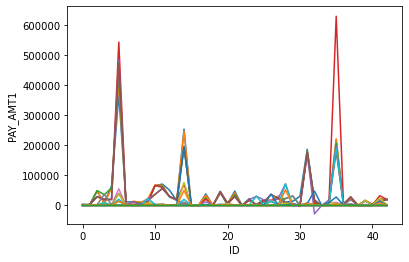

In [176]:
plt.plot(df3)
plt.xlabel('ID')
plt.ylabel('PAY_AMT1')